# Telco Customer Churn

each rown represents a customer,each column conains customers attributes describes on the column Metadata.
The raw data contains 7043 rows(customers) and 21 columns{features}.
The {Churn} column is our target.

In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [19]:
df = pd.read_csv('Customer Churn.csv')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.shape

(7043, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
#replacing blanks with 0 as tenure is 0 and no total charges are recorded 

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(' ','0')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.isnull().sum().sum()

0

In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
df['customerID'].duplicated().sum()

0

In [29]:
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [35]:
#converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [33]:
df['SeniorCitizen'].head()

0    No
1    No
2    No
3    No
4    No
Name: SeniorCitizen, dtype: object

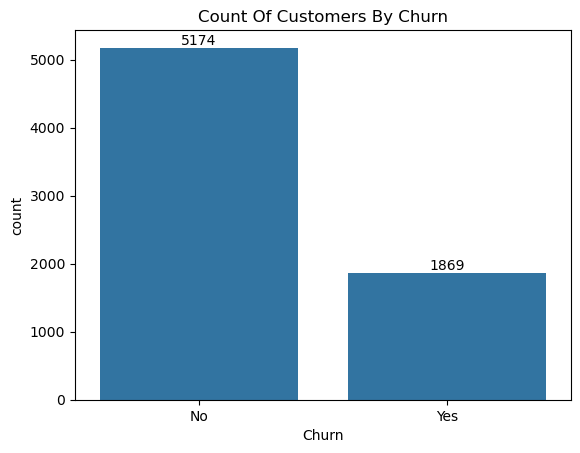

In [39]:
ax = sns.countplot(x = 'Churn',data = df)
plt.title("Count Of Customers By Churn")
for bars in ax.containers:
    ax.bar_label(bars)

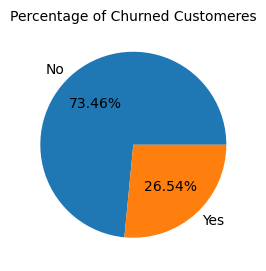

In [49]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'],labels = gb.index,autopct = '%1.2f%%')
plt.title("Percentage of Churned Customeres", fontsize = 10)

plt.show()


# plt.show()

In [51]:
#from the given pie chart we can conclude that 26.54% of our customers have churned out. 


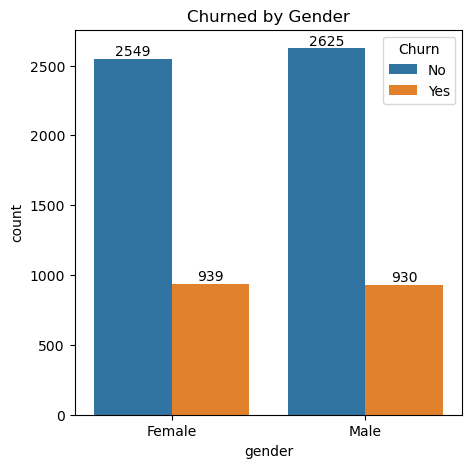

In [67]:
plt.figure(figsize = (5,5))
ax =  sns.countplot(x = 'gender',data = df,hue = 'Churn')
for bars in ax.containers:
    ax.bar_label(bars)
    plt.title("Churned by Gender")
plt.show()

Text(0.5, 1.0, 'Churn by senior citizen')

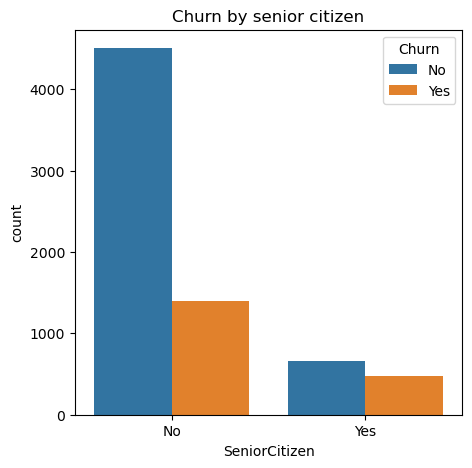

In [71]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'SeniorCitizen',data = df,hue = 'Churn')
plt.title("Churn by senior citizen")


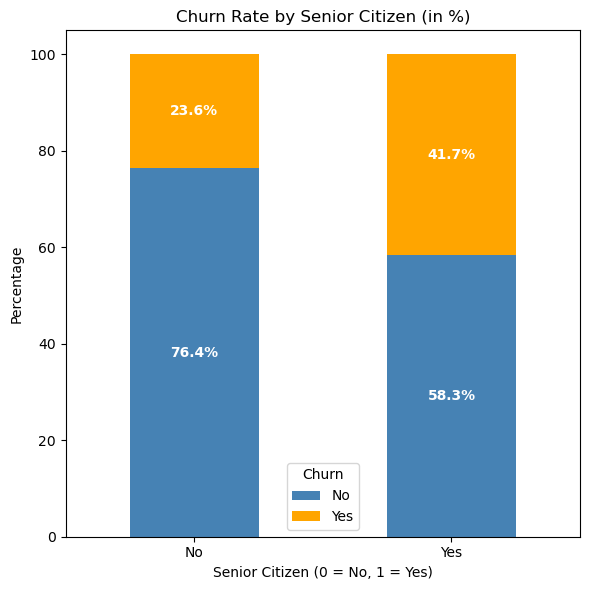

In [81]:

# Step 1: Grouping
group = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Step 2: Convert to %
group_percent = group.div(group.sum(axis=1), axis=0) * 100

# Step 3: Plot with custom colors: [Not Churn, Churn]
custom_colors = ['steelblue', 'orange']  # Not Churn, Churn
ax = group_percent.plot(kind='bar', stacked=True, figsize=(6, 6), color=custom_colors)

# Step 4: Add % Labels
for i, total in enumerate(group_percent.values):
    bottom = 0
    for j, val in enumerate(total):
        if val > 0:  # Only show if % is greater than 0
            ax.text(
                i,
                bottom + val / 2,
                f"{val:.1f}%",
                ha='center', va='center',
                color='white', fontsize=10, fontweight='bold'
            )
        bottom += val

# Step 5: Formatting
plt.title("Churn Rate by Senior Citizen (in %)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.legend(title="Churn", labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [1]:
#comparative a greater pecentage of people in senior citizen category have churned

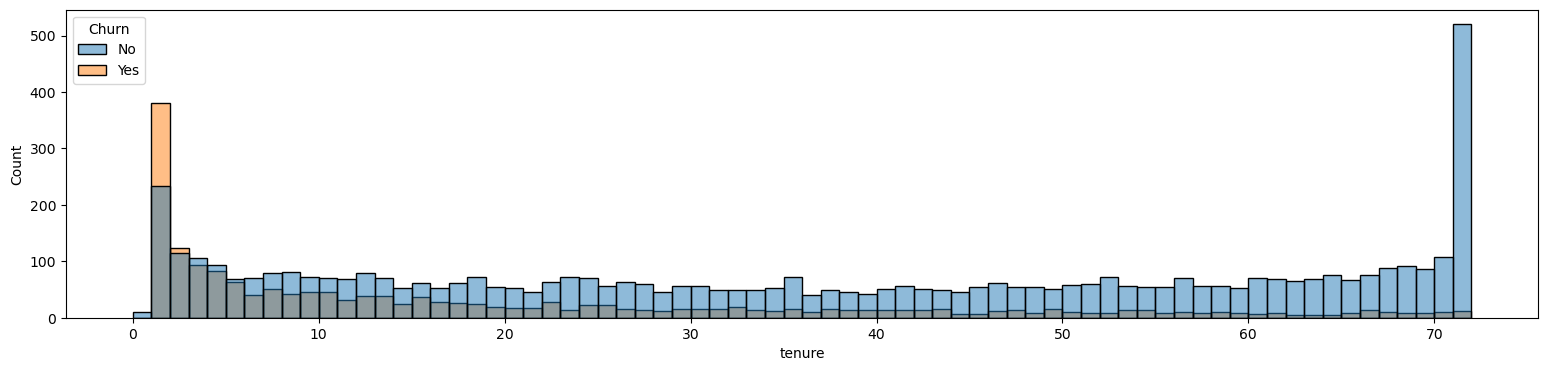

In [25]:
plt.figure(figsize = (19,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

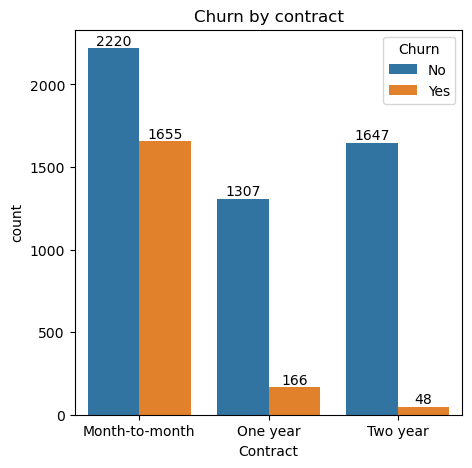

In [29]:
plt.figure(figsize = (5,5))
ax =sns.countplot(x = 'Contract',data = df,hue = 'Churn')
plt.title("Churn by contract")
for bars in ax.containers:
    ax.bar_label(bars)


In [31]:
#people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

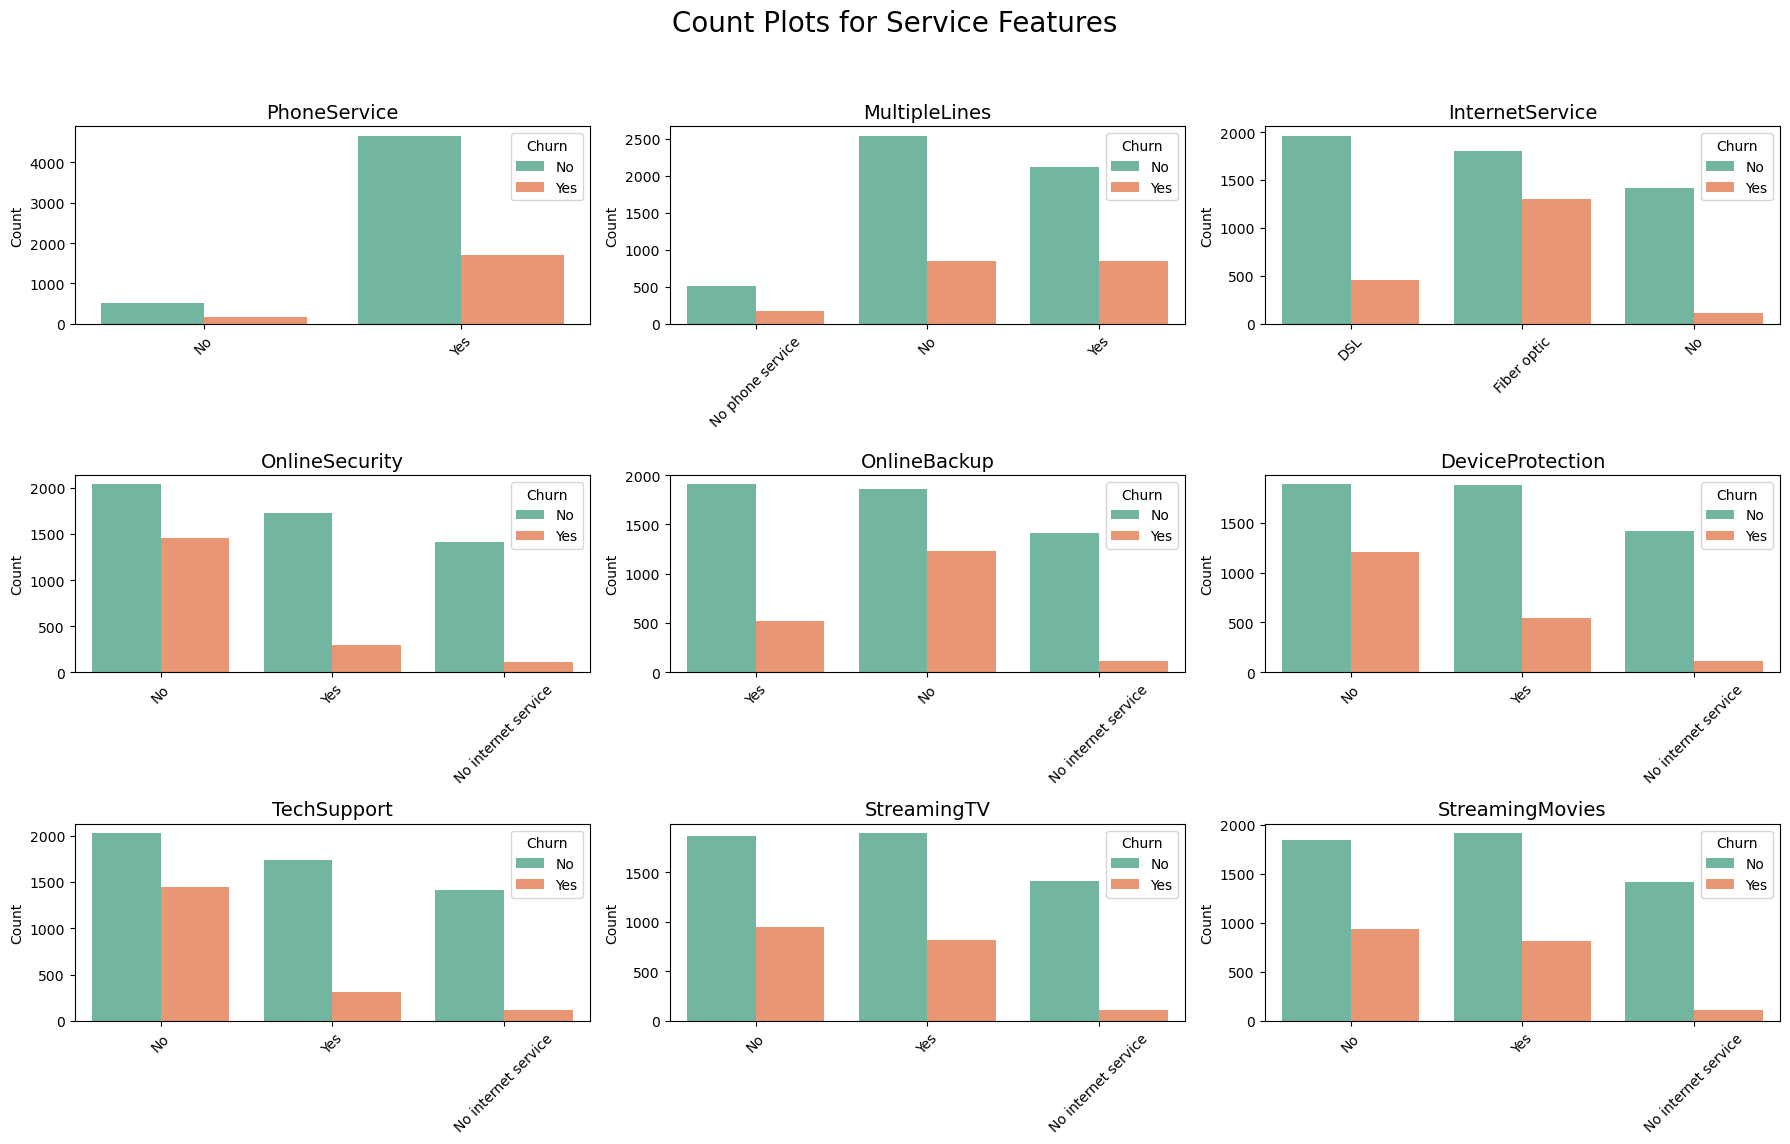

In [25]:


# Assuming your DataFrame is called df and contains the mentioned columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies']

# Create a 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Count Plots for Service Features", fontsize=20)

# Flatten the 3x3 axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot its countplot
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2",hue = 'Churn')
    axes[i].set_title(col, fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel("")  # Optional: remove x-label for a cleaner look
    axes[i].set_ylabel("Count")

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for suptitle
plt.show()


#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

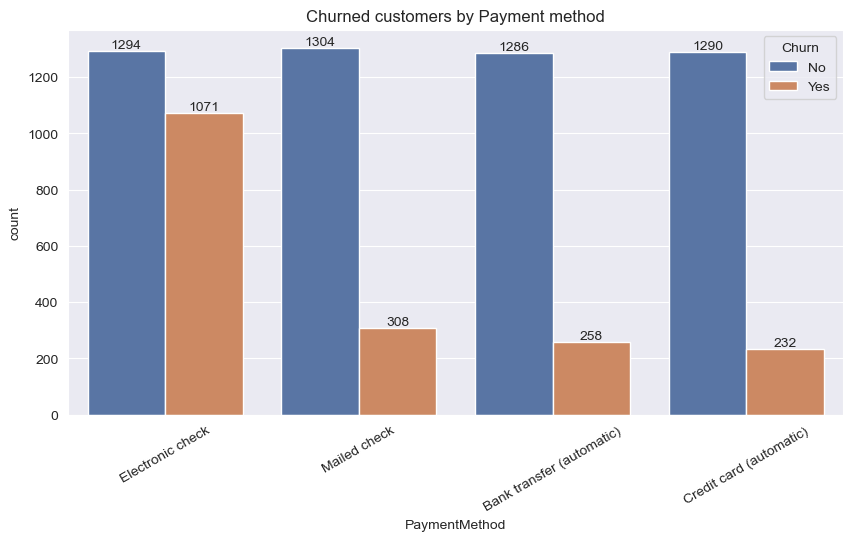

In [50]:
sns.set({'figure.figsize':(10,5)})
ax = sns.countplot(x = 'PaymentMethod' , data = df,hue = 'Churn')
plt.title('Churned customers by Payment method')
plt.xticks(rotation = 30)
for bars in ax.containers:
    ax.bar_label(bars)
    

In [52]:
#customer is likely to churn when he is using electronic check as a payment method. 